# Importing Data

In [1]:
#Imports for the codebase
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

In [5]:
#NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

#NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv'

In [ ]:
ny_drugs_dec_2008['category']=ny_drugs_dec_2008['category'].replace('DANGEROUS DRUGS', 'DRUG/NARCOTIC')
print("\nDataFrame after replacement:")
print(ny_drugs_dec_2008) 

In [ ]:
#Prostitution arrests by week

ny_prostitutes_by_week = ny_prostitutes_dec_2008.groupby('date').size().reset_index(name='occurrence')

sf_prostitutes_by_week = sf_prostitutes_2008.groupby('date').size().reset_index(name='occurrence')

# Plot the occurrences by date
plt.figure(figsize=(20, 15))

ny_prostitutes_by_week['date'] = pd.to_datetime(ny_prostitutes_by_week['date'])
sf_prostitutes_by_week['date'] = pd.to_datetime(sf_prostitutes_by_week['date'])


plt.plot(ny_prostitutes_by_week['date'], ny_prostitutes_by_week['occurrence'], marker='o', linestyle='-', color='b')
plt.plot(sf_prostitutes_by_week['date'],sf_prostitutes_by_week['occurrence'], marker='o', linestyle='-', color='r')

plt.title('New York Occurrences v. San Fransisco of Prostitution Arrests by Week')
plt.xlabel('Date')
plt.ylabel('Occurrence')
#plt.yticks(range(0,max(ny_occurrences_by_date['occurence'].max(), sf_occurrences_by_date['occurence'].max()) +5, 5))
max_occurrence = max(ny_prostitutes_by_week['occurrence'].max(), sf_prostitutes_by_week['occurrence'].max())
plt.yticks(range(0, max_occurrence + 5, 5))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:

# Drug arrests by Week

ny_occurrences_by_date['rolling_avg'] = ny_occurrences_by_date['occurrence'].rolling(window=3).mean()
sf_occurrences_by_date['rolling_avg'] = sf_occurrences_by_date['occurrence'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))

plt.plot(ny_occurrences_by_date['date'], ny_occurrences_by_date['rolling_avg'], marker='o', linestyle='-', color='b', label='NY - Rolling Avg')
plt.plot(sf_occurrences_by_date['date'], sf_occurrences_by_date['rolling_avg'], marker='o', linestyle='-', color='r', label='SF - Rolling Avg')

plt.title('New York v. San Fransisco Occurrences of Drug Arrests by Week')
plt.xlabel('Date')
plt.ylabel('Average Occurrence')
plt.xticks(sf_occurrences_by_date['date'], rotation=45)
plt.yticks(range(0, max_occurrence + 20, 20))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

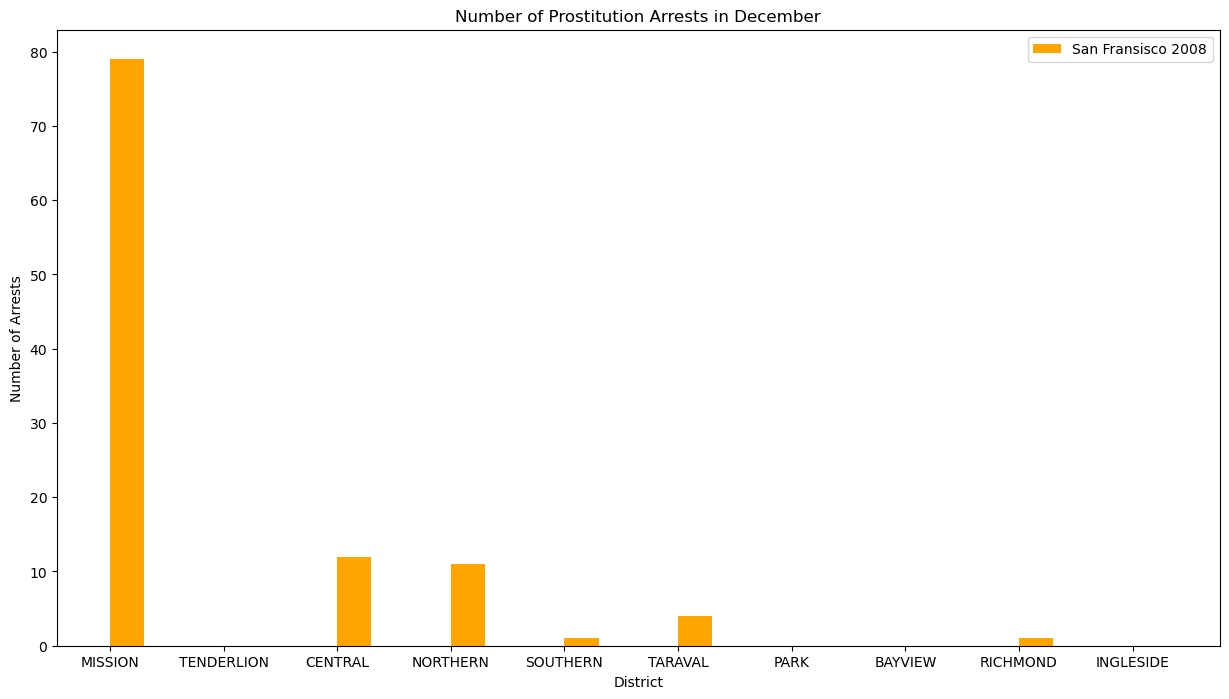

In [ ]:

#District Prostitution arrests in December 

sf_pd_district = ['MISSION', 'TENDERLION', 'CENTRAL', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'PARK', 'BAYVIEW', 'RICHMOND', "INGLESIDE"]

# Count occurrences for each day in both years
#sortedbyday_ny_2008 = ny_prostitutes_dec_2008['dayofweek'].value_counts().reindex(day_order, fill_value=0)

sortedbyday_sf_2008 = sf_prostitutes_2008['pd_district'].value_counts().reindex(sf_pd_district, fill_value=0)

#Normalizing the data
#total_arrests_ny_2008 = ny_prostitutes_dec_2008['dayofweek'].count()

total_arrests_sf_2008 = sf_prostitutes_2008['pd_district'].count()

#normalized vals
#norm_ny_2008 = (sortedbyday_ny_2008/total_arrests_ny_2008)*100

norm_sf_2008 = (sortedbyday_sf_2008/total_arrests_sf_2008)*100

#formatting the bars
ind = np.arange(10)
width = 0.3
# Plotting
plt.figure(figsize=(15,8))
#plt.bar(ind, norm_ny_2008, width, color="blue", label="New York 2008")

plt.bar(ind+width, sortedbyday_sf_2008, width, color="orange", label="San Fransisco 2008")

plt.legend(loc="best")
plt.title("Number of Prostitution Arrests in December")
plt.xlabel("District")
plt.ylabel("Number of Arrests")
plt.xticks(ind + width / 2, sf_pd_district)
# Print the chart to the screen
plt.show()





# Sorting data

In [ ]:
#Sorting by dangerous drugs
ny_combined_dataset = ny_combined_dataset.loc[ny_combined_dataset['description'].str.contains('CONTROLLED SUBSTANCE', na=False)]
ny_combined_dataset.tail()

In [ ]:
#sorting drugs by dates in 2008
ny_drugs_dec_2008 = ny_drug_df.loc[(ny_drug_df['date'] >= '2008-12-01') & (ny_drug_df['date'] <= '2008-12-31')].set_index('date')
ny_drugs_dec_2008.head()

,description,category,incident_code,pd_district,dayofweek
date,,,,,
2008-12-10,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,K,Wednesday
2008-12-15,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Monday
2008-12-13,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,M,Saturday
2008-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Friday
2008-12-06,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Saturday


In [ ]:
#sorting drugs by dates in 2017
ny_drugs_dec_2017 = ny_drug_df.loc[(ny_drug_df['date'] >= '2017-12-01') & (ny_drug_df['date'] <= '2017-12-31')].set_index('date')
ny_drugs_dec_2017.head()

,description,category,incident_code,pd_district,dayofweek
date,,,,,
2017-12-02,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,B,Saturday
2017-12-07,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Thursday
2017-12-01,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Friday
2017-12-22,SALE SCHOOL GROUNDS,DANGEROUS DRUGS,523.0,S,Friday
2017-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,K,Tuesday


In [ ]:
#Sorting by prostitution
ny_prostitution_df = ny_cleaned_df.loc[ny_cleaned_df['category'].str.contains('PROSTITUTION', na=False)]
ny_prostitution_df.head()

,date,description,category,incident_code,pd_district,dayofweek
40,2018-10-26,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,Q,Friday
875,2020-11-06,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,B,Friday
1042,2020-12-30,"PROSTITUTION 4,PROMOTING&SECUR",PROSTITUTION & RELATED OFFENSES,576.0,B,Wednesday
1308,2020-12-23,SEX TRAFFICKING,PROSTITUTION & RELATED OFFENSES,586.0,B,Wednesday
1664,2020-11-06,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,B,Friday


In [ ]:
#sorting prostitution by dates in 2008
ny_prostitution_dec_2008 = ny_prostitution_df.loc[(ny_prostitution_df['date'] >= '2008-12-01') & (ny_prostitution_df['date'] <= '2008-12-31')].set_index('date')
ny_prostitution_dec_2008.head()

,description,category,incident_code,pd_district,dayofweek
date,,,,,
2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
2008-12-30,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,Q,Tuesday
2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
2008-12-30,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Tuesday
2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday


In [ ]:
#sorting prostitution by dates in 2017
ny_prostitution_dec_2017 = ny_prostitution_df.loc[(ny_prostitution_df['date'] >= '2017-12-01') & (ny_prostitution_df['date'] <= '2017-12-31')].set_index('date')
ny_prostitution_dec_2017.head()

,description,category,incident_code,pd_district,dayofweek
date,,,,,
2017-12-02,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,B,Saturday
2017-12-08,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,K,Friday
2017-12-16,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Saturday
2017-12-13,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,Q,Wednesday
2017-12-08,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Friday


# Saving data to csv

In [ ]:
#Reset indexes in dataframes
ny_drugs_dec_2008 = ny_drugs_dec_2008.reset_index()
ny_drugs_dec_2017 = ny_drugs_dec_2017.reset_index()

ny_prostitution_dec_2008 = ny_prostitution_dec_2008.reset_index()
ny_prostitution_dec_2017 = ny_prostitution_dec_2017.reset_index()

In [ ]:
#save to CSV file
ny_drugs_dec_2008.to_csv("./Cleaned_Resources/ny_drugs_dec_2008.csv", index=False)
ny_drugs_dec_2017.to_csv("./Cleaned_Resources/ny_drugs_dec_2017.csv", index=False)

ny_prostitution_dec_2008.to_csv("./Cleaned_Resources/ny_prostitution_dec_2008.csv", index=False)
ny_prostitution_dec_2017.to_csv("./Cleaned_Resources/ny_prostitution_dec_2017.csv", index=False)